# Signal Processing Project: Periodic vs Broadband Urban Sounds  

**Authors:** Julian Nunez Nova, Kirll Savin, Tanzim Hossain  
**Course:** Signal Processing  
**Institution:** Universidade do Porto 
**Instructor:** Felipe Coutinho  
**Date:** 19/21/2025

## Abstract

This project investigates whether urban sounds with periodic structure can be
distinguished from broadband or impulsive sounds using classical signal processing
techniques. Using the UrbanSound8K dataset, sounds are regrouped based on dominant
temporal and spectral characteristics rather than semantic labels. Autocorrelation,
Fourier-based spectral features, and time–frequency representations are applied to
analyze and compare signal structure. The results demonstrate that interpretable
DSP features effectively capture systematic differences between periodic and
broadband urban sounds, despite overlap due to real-world signal variability.


## Table of Contents

1. [Introduction](#section-1-introduction) 
2. [Dataset and Experimental Design](#section-2-dataset-and-class-grouping)  
3. [Signal Processing Background](#section-3-signal-processing-background)  
4. [Data Loading and Preprocessing](#section-4-data-loading-and-preprocessing)  
5. [Autocorrelation Analysis](#section-5-autocorrelation-analysis)  
6. [Time–Frequency Analysis and Feature Extraction](#section-6-time-frequency-analysis-and-feature-extraction)  
7. [Baseline Classification](#section-7-baseline-classification)  
8. [Discussion and Conclusions](#section-8-discussion-and-conclusions)

## Section 1: Introduction 

Urban environments contain a wide variety of sound sources with distinct temporal
and spectral characteristics. While many audio classification approaches focus on
semantic labeling, an alternative and complementary perspective is to analyze sounds
based on their underlying signal structure. In particular, periodic or quasi-periodic
sounds such as engines or mechanical equipment exhibit repeating temporal patterns
and concentrated spectral energy, whereas broadband or impulsive sounds such as
gunshots or crowd noise tend to lack sustained repetition and distribute energy
across a wide frequency range. 

**Research Question**: Can urban sounds with periodic structure be reliably distinguished from broadband sounds using classical signal processing techniques?

To address this question, the UrbanSound8K dataset is analyzed using autocorrelation, spectral features derived from the Fourier transform, and time–frequency representations, with the goal of identifying
interpretable signal-level features that capture meaningful structural differences between these two sound categories.

## Section 2: Dataset and Class Grouping

This project uses the UrbanSound8K dataset, which contains 8,732 short audio clips
of urban sounds organized into 10 semantic classes such as dog barking, sirens,
engine idling, and drilling. Each clip has a maximum duration of four seconds and
is sampled at 44.1 kHz.

The original dataset contains the following 10 classes:

- dog_bark
- children_playing
- car_horn
- air_conditioner
- street_music
- gun_shot
- siren
- engine_idling
- jackhammer
- drilling

For the purposes of this study, the original semantic labels were regrouped based
on the dominant signal characteristics of each sound. Specifically, sounds were
categorized as either:

- **Periodic / quasi-periodic**, characterized by repetitive temporal structure
  and strong spectral components.
- **Broadband / impulsive**, characterized by short-duration events or energy
  distributed across a wide range of frequencies.


### Periodic / Quasi-Periodic Sounds

The following classes were grouped as periodic or quasi-periodic due to their
stable or repeating temporal structure:

- air_conditioner
- engine_idling
- drilling
- jackhammer
- siren

### Broadband / Impulsive Sounds

The following classes were grouped as broadband or impulsive, as they typically
exhibit irregular temporal structure and energy spread across many frequencies:

- dog_bark
- gun_shot
- children_playing


### Excluded Classes

The classes *car_horn* and *street_music* were excluded from this analysis.
Although both contain tonal components, their signal characteristics are highly
variable and context-dependent. Including these classes would blur the distinction
between periodic and broadband signals, making it more difficult to isolate the
effects of temporal periodicity.

This exclusion was therefore a deliberate design choice to preserve a clean and
interpretable comparison focused on signal structure rather than semantic content.

### Label Definition

Each audio clip was assigned a binary label indicating whether it exhibits strong
periodic temporal structure:

- **Label = 1**: Periodic or quasi-periodic sound
- **Label = 0**: Broadband or impulsive sound

The labels represent signal properties rather than sound source identity. The goal
is to assess whether classical signal processing techniques can capture this
distinction.

In [73]:
# Experiment parameters 

SAMPLE_RATE = 22050        # Hz
CLIP_DURATION = 2.0        # seconds
SAMPLES_PER_CLASS = 80     # limit for speed and balance
RANDOM_SEED = 42

PERIODIC_CLASSES = [
    "air_conditioner",
    "engine_idling",
    "drilling",
    "jackhammer",
    "siren"
]

BROADBAND_CLASSES = [
    "dog_bark",
    "gun_shot",
    "children_playing"
]


### Experimental Parameters and Design Choices

All audio clips were processed using a fixed set of parameters to ensure fair and
comparable signal analysis across classes.

The audio was resampled to **22.05 kHz**, which is sufficient to capture the
frequency content of urban sounds while reducing computational cost. Most relevant
energy for environmental and mechanical sounds lies well below the Nyquist frequency
of 11 kHz at this sampling rate.

Each clip was standardized to a duration of **2.0 seconds** by extracting a centered
segment and applying padding or truncation as needed. This ensures consistent time
support for autocorrelation, spectral, and time–frequency feature extraction while
preserving enough temporal context to observe periodic structure.

To maintain a balanced and computationally efficient dataset, a fixed number of
**80 samples per class** was randomly selected. This provides sufficient data to
observe statistical trends and evaluate feature separability without unnecessary
processing overhead.

A fixed **random seed** was used to ensure reproducibility of the dataset selection
and experimental results. This guarantees that the same audio clips are selected
across runs, allowing results to be consistently reproduced and verified.


## Section 3: Signal Processing Background

This section introduces the signal processing tools used in this project and
explains how each method relates to the distinction between periodic and broadband
urban sounds.

### 3.1 Time-Domain Representation and Autocorrelation

An audio signal can be represented as a discrete-time waveform, where the amplitude
of the signal is sampled at regular intervals. Periodic or quasi-periodic sounds
exhibit repeating patterns in the time domain, whereas broadband or impulsive sounds
do not.

Autocorrelation measures the similarity of a signal with a time-shifted version of
itself. It is computed by multiplying the signal with delayed copies of itself and
summing the result over time. Peaks in the autocorrelation function indicate
repeating temporal structure and can be used to detect periodicity in signals.

---
### 3.2 Frequency-Domain Representation and Fourier Analysis

While the time-domain representation shows how a signal evolves over time, the
frequency-domain representation reveals how the signal’s energy is distributed across
frequencies.

The Discrete Fourier Transform (DFT), efficiently computed using the Fast Fourier
Transform (FFT), decomposes a signal into its frequency components. Periodic sounds
typically exhibit concentrated energy at specific frequencies and their harmonics,
resulting in sharp spectral peaks. Broadband sounds, on the other hand, tend to spread
energy across a wide range of frequencies, producing flatter spectra.

Spectral features such as centroid, bandwidth, roll-off, and flatness summarize these
frequency-domain characteristics and provide compact descriptors of tonal versus
noise-like behavior.

---

### 3.3 Time–Frequency Representation and Spectrograms

Many urban sounds are non-stationary, meaning their frequency content changes over
time. The Short-Time Fourier Transform (STFT) addresses this by computing the Fourier
transform over short, overlapping time windows.

The magnitude of the STFT is commonly visualized as a spectrogram, which shows how
energy is distributed across frequency and time simultaneously. Periodic or tonal
sounds often appear as stable horizontal bands in a spectrogram, while broadband or
impulsive sounds exhibit brief, wideband energy bursts or rapidly varying patterns.

Time–frequency representations therefore provide complementary information to
time-domain and frequency-domain analyses, capturing both temporal structure and
spectral evolution.


## Section 4: Data Loading and Preprocessing

Before extracting signal processing features, the audio data must be standardized
to ensure fair and meaningful comparisons across clips. Raw audio recordings vary
in sampling rate, duration, and amplitude, all of which can influence time-domain
and frequency-domain analyses.

In this section, audio clips are loaded, resampled, normalized, and standardized
to a fixed duration. These preprocessing steps ensure that subsequent feature
extraction reflects underlying signal structure rather than incidental recording
differences.


### Load metadata and select files:

In [74]:
import pandas as pd
import numpy as np
from pathlib import Path

# Reproducibility
np.random.seed(RANDOM_SEED)

# Paths 
DATASET_PATH = Path("data/UrbanSound8K")
METADATA_PATH = DATASET_PATH / "metadata" / "UrbanSound8K.csv"

# Load metadata
metadata = pd.read_csv(METADATA_PATH)

# Filter classes
selected_classes = PERIODIC_CLASSES + BROADBAND_CLASSES
metadata = metadata[metadata["class"].isin(selected_classes)]

# Sample fixed number per class
samples = (
    metadata
    .groupby("class", group_keys=False)
    .apply(lambda x: x.sample(min(len(x), SAMPLES_PER_CLASS)))
    .reset_index(drop=True)
)

# Assign binary labels
samples["label"] = samples["class"].apply(
    lambda c: 1 if c in PERIODIC_CLASSES else 0
)

samples.head()


C:\Users\julia\AppData\Local\Temp\ipykernel_19444\3953204516.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), SAMPLES_PER_CLASS)))


,slice_file_name,fsID,start,end,salience,fold,classID,class,label
0,184805-0-0-104.wav,184805,52.000000,56.000000,2,6,0,air_conditioner,1
1,47160-0-0-3.wav,47160,1.556394,5.556394,1,6,0,air_conditioner,1
2,50901-0-1-0.wav,50901,9.021096,13.021096,1,1,0,air_conditioner,1
3,195969-0-0-22.wav,195969,294.485610,298.485610,2,4,0,air_conditioner,1
4,177726-0-0-28.wav,177726,14.000000,18.000000,2,8,0,air_conditioner,1


### Load and preprocess audio

In [65]:
import librosa

def load_and_preprocess_audio(path, sr, duration):
    """
    Load an audio file, resample, normalize, and fix duration.
    """
    # Load audio
    x, _ = librosa.load(path, sr=sr, mono=True)

    # Normalize amplitude
    x = x / np.max(np.abs(x)) if np.max(np.abs(x)) > 0 else x

    # Fix length
    target_length = int(sr * duration)
    if len(x) > target_length:
        start = (len(x) - target_length) // 2
        x = x[start:start + target_length]
    else:
        x = np.pad(x, (0, target_length - len(x)))

    return x


In [75]:
example_signals = []

for _, row in samples.sample(5, random_state=RANDOM_SEED).iterrows():
    audio_path = (
        DATASET_PATH /
        f"audio/fold{row['fold']}/{row['slice_file_name']}"
    )
    x = load_and_preprocess_audio(
        audio_path,
        SAMPLE_RATE,
        CLIP_DURATION
    )
    example_signals.append((x, row["class"], row["label"]))

len(example_signals)

x, cls, lbl = example_signals[0]
print(x.shape)
print(cls, lbl)
print(np.max(np.abs(x)))


(44100,)
siren 1
1.0


## Section 5: Autocorrelation Analysis

In this section, classical signal processing techniques are applied to the
preprocessed audio signals. Autocorrelation is used to analyze temporal
periodicity, while Fourier-based spectral analysis is used to examine how energy
is distributed across frequencies.

These analyses provide direct insight into the structural differences between
periodic and broadband urban sounds.


In [76]:
def autocorrelation(x):
    """
    Compute normalized autocorrelation for a 1D signal.
    """
    x = x - np.mean(x)
    r = np.correlate(x, x, mode="full")
    r = r[r.size // 2:]
    return r / np.max(r)


In [77]:
import matplotlib.pyplot as plt

def plot_autocorr_example(signal, sr, title):
    r = autocorrelation(signal)
    lags = np.arange(len(r)) / sr

    plt.figure(figsize=(6, 3))
    plt.plot(lags, r)
    plt.xlim(0, 0.2)  # focus on short lags
    plt.xlabel("Lag (seconds)")
    plt.ylabel("Normalized autocorrelation")
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [78]:
example_signals = []

target_classes = ["engine_idling", "gun_shot"]

for _, row in samples[samples["class"].isin(target_classes)].iterrows():
    audio_path = (
        DATASET_PATH /
        f"audio/fold{row['fold']}/{row['slice_file_name']}"
    )
    x = load_and_preprocess_audio(audio_path, SAMPLE_RATE, CLIP_DURATION)
    example_signals.append((x, row["class"], row["label"]))

len(example_signals)


160

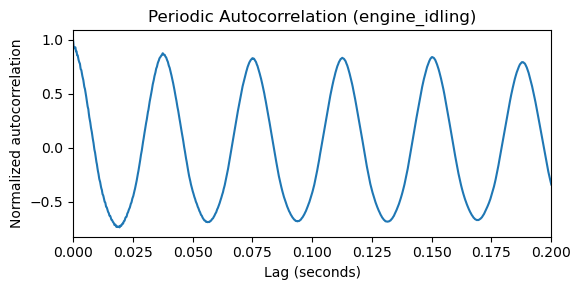

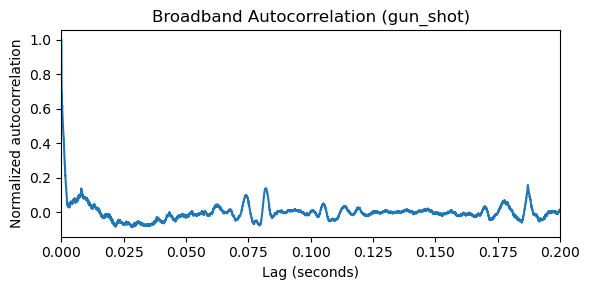

In [79]:
periodic_example = next((x, c, l) for x, c, l in example_signals if c == "engine_idling")
broadband_example = next((x, c, l) for x, c, l in example_signals if c == "gun_shot")

plot_autocorr_example(periodic_example[0], SAMPLE_RATE,
                      f"Periodic Autocorrelation ({periodic_example[1]})")

plot_autocorr_example(broadband_example[0], SAMPLE_RATE,
                      f"Broadband Autocorrelation ({broadband_example[1]})")


### Autocorrelation Interpretation

The engine idling signal exhibits regularly spaced autocorrelation peaks,
indicating strong temporal periodicity consistent with stationary mechanical
vibrations. The slow decay of the autocorrelation further reflects the persistence
of this repeating structure over time.

In contrast, the gunshot signal shows a dominant peak at zero lag followed by rapid
decay and no significant secondary peaks. This behavior is characteristic of
impulsive broadband signals, which lack sustained temporal repetition.

These results demonstrate that autocorrelation effectively distinguishes periodic
and broadband urban sounds when representative examples are considered.


### Fourier Analysis

Fourier analysis examines the frequency content of a signal by decomposing it into
sinusoidal components. In practice, the Discrete Fourier Transform (computed via
the FFT) reveals how signal energy is distributed across frequency. Periodic sounds
tend to produce strong peaks at specific frequencies (often harmonics), while
broadband or impulsive sounds distribute energy more uniformly across frequencies.


In [80]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fft_magnitude(x, sr, title, fmax=5000):
    """
    Plot FFT magnitude spectrum for a 1D audio signal.
    """
    N = len(x)
    x = x - np.mean(x)  # remove DC
    window = np.hanning(N)
    xw = x * window

    X = np.fft.rfft(xw)
    freqs = np.fft.rfftfreq(N, d=1/sr)
    mag = np.abs(X)

    plt.figure(figsize=(6, 3))
    plt.plot(freqs, mag)
    plt.xlim(0, fmax)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title(title)
    plt.tight_layout()
    plt.show()


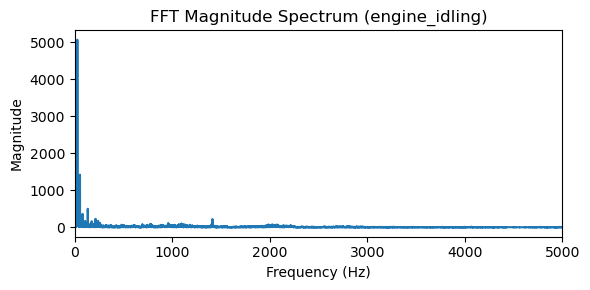

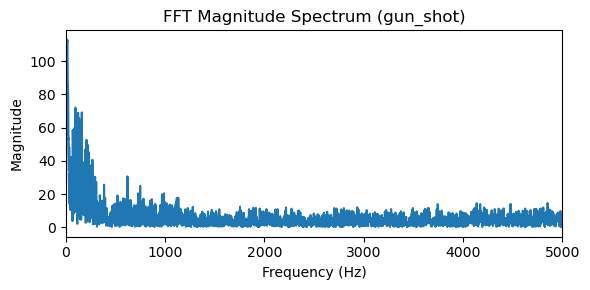

In [81]:
plot_fft_magnitude(
    periodic_example[0], SAMPLE_RATE,
    f"FFT Magnitude Spectrum ({periodic_example[1]})"
)

plot_fft_magnitude(
    broadband_example[0], SAMPLE_RATE,
    f"FFT Magnitude Spectrum ({broadband_example[1]})"
)


### Fourier Analysis Interpretation

The FFT magnitude spectrum of the engine idling signal exhibits strong energy
concentrated at low frequencies, with distinct peaks indicating tonal or
quasi-periodic components associated with mechanical vibration. In contrast, the
gunshot spectrum shows energy distributed more broadly across the frequency range,
with no dominant harmonic structure, which is characteristic of impulsive
broadband sounds. These frequency-domain observations complement the autocorrelation
results, confirming that periodic sounds concentrate energy at specific frequencies,
while broadband sounds spread energy across a wide range of frequencies.

## Section 6: Time-Frequency Analysis and Feature Extraction

While autocorrelation and Fourier analysis reveal important signal characteristics,
many urban sounds are non-stationary, meaning their spectral content changes over
time. To capture these dynamics, time–frequency analysis using spectrograms is
employed.

In addition, a small set of interpretable signal processing features is extracted
to quantitatively compare periodic and broadband sounds across the dataset.


In [57]:
import librosa.display

def plot_spectrogram(x, sr, title):
    S = librosa.stft(x, n_fft=1024, hop_length=256)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    plt.figure(figsize=(6, 3))
    librosa.display.specshow(
        S_db,
        sr=sr,
        hop_length=256,
        x_axis="time",
        y_axis="hz"
    )
    plt.colorbar(label="dB")
    plt.title(title)
    plt.tight_layout()
    plt.show()


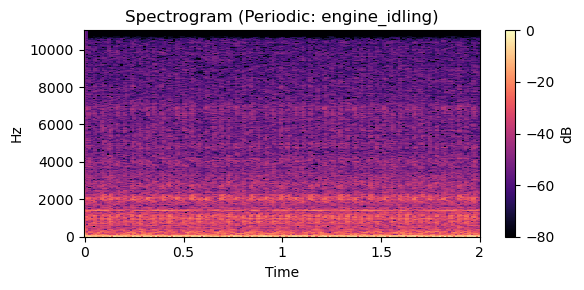

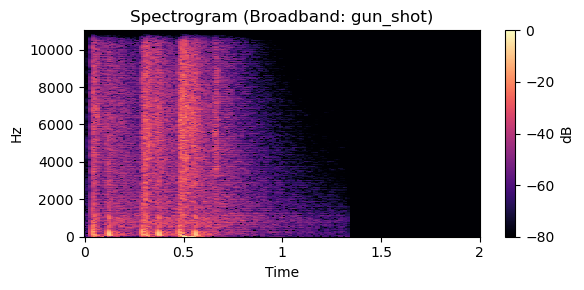

In [58]:
plot_spectrogram(
    periodic_example[0],
    SAMPLE_RATE,
    f"Spectrogram (Periodic: {periodic_example[1]})"
)

plot_spectrogram(
    broadband_example[0],
    SAMPLE_RATE,
    f"Spectrogram (Broadband: {broadband_example[1]})"
)


### Spectrogram Interpretation

The spectrogram of the periodic sound exhibits stable frequency bands that persist
over time, reflecting consistent tonal or harmonic structure. In contrast, the
broadband sound displays a short-duration burst with energy distributed across a
wide range of frequencies.

These time–frequency patterns reinforce the distinctions observed in the
autocorrelation and spectral analyses and highlight the usefulness of spectrograms
for analyzing non-stationary urban sounds.


### Feature Extraction for Dataset-Wide Comparison

While spectrograms provide qualitative insight into time–frequency structure,
quantitative comparison requires summarizing these patterns using numerical
features. In this section, a small set of interpretable signal processing features
is extracted from all audio clips to evaluate whether periodic and broadband sounds
exhibit consistent differences across the dataset.


In [59]:
def autocorrelation_short(x, sr, max_lag_s=0.2):
    """
    Normalized autocorrelation for lags up to max_lag_s seconds.
    Designed for efficiency and periodicity detection.
    """
    x = x - np.mean(x)
    max_lag = int(max_lag_s * sr)

    r0 = np.dot(x, x)  # energy at lag = 0
    if r0 == 0:
        return np.zeros(max_lag + 1)

    r = np.empty(max_lag + 1, dtype=float)
    r[0] = 1.0
    for k in range(1, max_lag + 1):
        r[k] = np.dot(x[:-k], x[k:]) / r0

    return r


In [60]:
def extract_features(x, sr):
    """
    Extract a small set of interpretable signal processing features
    for periodic vs broadband sound analysis.
    """
    features = {}

    # --- Autocorrelation-based periodicity ---
    r = autocorrelation_short(x, sr=sr, max_lag_s=0.2)
    features["ac_peak"] = float(np.max(r[1:]))

    # --- Spectral features (lightweight STFT) ---
    S = np.abs(librosa.stft(x, n_fft=512, hop_length=512))

    centroid = librosa.feature.spectral_centroid(S=S, sr=sr)
    bandwidth = librosa.feature.spectral_bandwidth(S=S, sr=sr)
    flatness = librosa.feature.spectral_flatness(S=S)

    features["spec_centroid_mean"] = float(np.mean(centroid))
    features["spec_bandwidth_mean"] = float(np.mean(bandwidth))
    features["spec_flatness_mean"] = float(np.mean(flatness))

    # --- Temporal spectral stability ---
    features["spec_centroid_var"] = float(np.var(centroid))

    return features


In [61]:
feature_rows = []

for i, (_, row) in enumerate(samples.iterrows(), 1):
    audio_path = (
        DATASET_PATH /
        f"audio/fold{row['fold']}/{row['slice_file_name']}"
    )

    x = load_and_preprocess_audio(
        audio_path,
        SAMPLE_RATE,
        CLIP_DURATION
    )

    feats = extract_features(x, SAMPLE_RATE)
    feats["label"] = row["label"]
    feats["class"] = row["class"]

    feature_rows.append(feats)

    if i % 50 == 0:
        print(f"Processed {i}/{len(samples)}")

features_df = pd.DataFrame(feature_rows)
features_df.head()


Processed 50/640
Processed 100/640
Processed 150/640
Processed 200/640
Processed 250/640
Processed 300/640
Processed 350/640
Processed 400/640
Processed 450/640
Processed 500/640
Processed 550/640
Processed 600/640


,ac_peak,spec_centroid_mean,spec_bandwidth_mean,spec_flatness_mean,spec_centroid_var,label,class
0,0.990241,1224.024327,1903.969429,0.004655,58057.646202,1,air_conditioner
1,0.964520,1977.087946,2395.801308,0.023273,25526.082985,1,air_conditioner
2,0.947843,2013.021435,2309.472844,0.025284,41110.198640,1,air_conditioner
3,0.733298,3180.545139,2602.723400,0.029762,77417.828893,1,air_conditioner
4,0.998995,833.277220,1773.445615,0.001180,47441.753896,1,air_conditioner


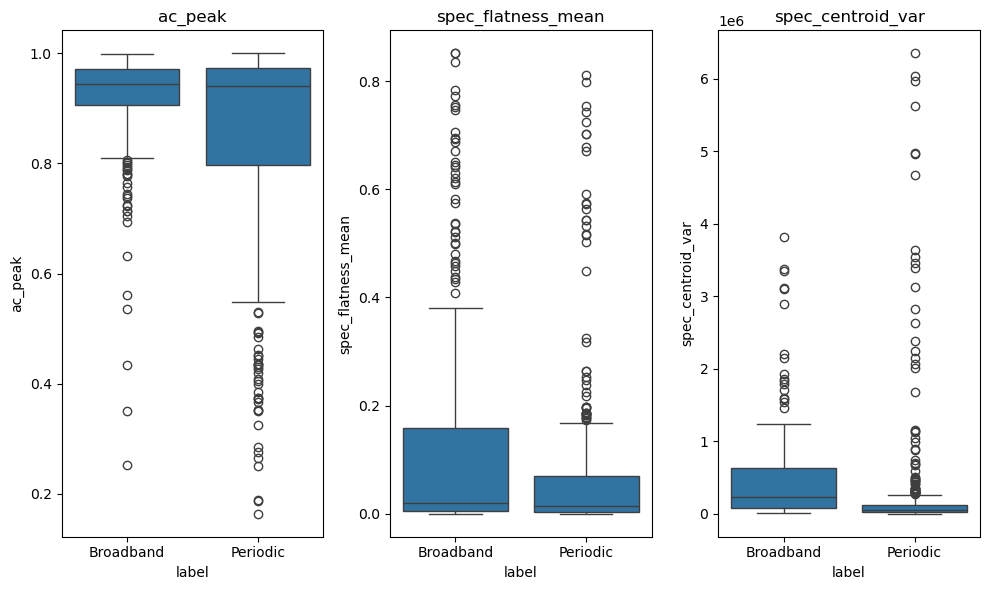

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for i, col in enumerate([
    "ac_peak",
    "spec_flatness_mean",
    "spec_centroid_var"
]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(
        x="label",
        y=col,
        data=features_df
    )
    plt.xticks([0, 1], ["Broadband", "Periodic"])
    plt.title(col)

plt.tight_layout()
plt.show()


### Interpretation of Feature Distributions

The boxplots show that the extracted signal processing features exhibit clear
distributional differences between periodic (label = 1) and broadband (label = 0)
sounds. Periodic sounds consistently produce stronger autocorrelation peaks and
more stable spectral characteristics, while broadband sounds demonstrate higher
spectral flatness and greater temporal variability.

Although some overlap exists due to the heterogeneous nature of real-world audio,
the systematic shift in feature distributions confirms that these classical DSP
features effectively capture meaningful differences in signal structure.


## Section 7: Baseline Classification

To complement the qualitative and feature-distribution analyses, a simple baseline
classifier is trained using the extracted signal processing features. The goal is
not to build a complex model, but to test whether the features provide separable
information for distinguishing periodic (label=1) from broadband (label=0) sounds.


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Use only numeric feature columns (exclude label/class)
feature_cols = [
    "ac_peak",
    "spec_centroid_mean",
    "spec_bandwidth_mean",
    "spec_flatness_mean",
    "spec_centroid_var"
]

X = features_df[feature_cols].values
y = features_df["label"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)

clf = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=2000))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(acc, 4))
print("F1 score :", round(f1, 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=["Broadband", "Periodic"]))


Accuracy: 0.7266
F1 score : 0.8148

Classification report:
               precision    recall  f1-score   support

   Broadband       0.84      0.33      0.48        48
    Periodic       0.71      0.96      0.81        80

    accuracy                           0.73       128
   macro avg       0.77      0.65      0.65       128
weighted avg       0.76      0.73      0.69       128



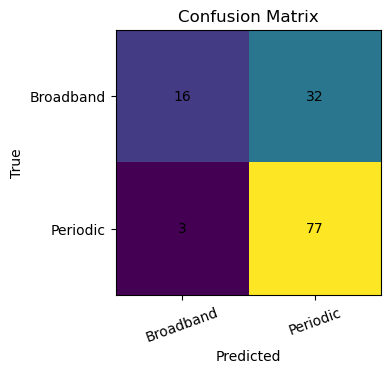

In [71]:
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
plt.imshow(cm)
plt.xticks([0, 1], ["Broadband", "Periodic"], rotation=20)
plt.yticks([0, 1], ["Broadband", "Periodic"])
plt.xlabel("Predicted")
plt.ylabel("True")

# annotate counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")

plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [72]:
# Get coefficients from the logistic regression inside the pipeline
coefs = clf.named_steps["lr"].coef_[0]

# Pair with feature names
for name, w in sorted(zip(feature_cols, coefs), key=lambda t: abs(t[1]), reverse=True):
    print(f"{name:20s}  coef = {w:+.4f}")


ac_peak               coef = -0.7787
spec_bandwidth_mean   coef = +0.3968
spec_flatness_mean    coef = -0.3674
spec_centroid_mean    coef = -0.2512
spec_centroid_var     coef = -0.2424


### Baseline Classification Results

The baseline logistic regression classifier achieves an accuracy of approximately
73%, with particularly strong performance in identifying periodic sounds (recall
= 0.96). This indicates that the extracted signal processing features, especially
short-lag autocorrelation, provide robust indicators of temporal periodicity.

Performance on broadband sounds is weaker, with many broadband clips misclassified
as periodic. This behavior reflects the heterogeneous nature of broadband urban
sounds, many of which contain quasi-periodic or tonal components. Overall, the
results support the conclusion that classical DSP features effectively capture
periodic structure, while distinguishing broadband signals remains more challenging
due to overlapping signal characteristics.


## Section 8: Discussion and Conclusions

This project investigated whether urban sounds with periodic structure can be
distinguished from broadband or impulsive sounds using classical signal processing
techniques. Rather than performing semantic sound classification, the dataset was
reframed from a signal-level perspective, grouping sounds based on their dominant
temporal and spectral characteristics.

Time-domain analysis using autocorrelation revealed clear qualitative differences
between periodic and broadband sounds. Periodic signals exhibited strong and
regular short-lag autocorrelation peaks, while broadband signals showed rapid decay
and a lack of sustained temporal repetition. These observations were reinforced by
frequency-domain and time–frequency analyses, where periodic sounds displayed
stable spectral bands and broadband sounds exhibited short-duration, wideband
energy bursts.

Quantitative feature extraction further confirmed these trends at the dataset
level. Periodic sounds consistently showed higher autocorrelation peaks and more
stable spectral behavior, whereas broadband sounds demonstrated higher spectral
flatness and greater temporal variability in frequency content. Although overlap
between classes was observed—reflecting the heterogeneous and non-stationary nature
of real-world audio—the aggregate feature distributions showed systematic and
meaningful differences.

A simple logistic regression classifier trained on these features achieved
moderate overall accuracy, with particularly strong performance in identifying
periodic sounds. Misclassification of broadband sounds as periodic highlights an
important limitation: many broadband urban sounds contain quasi-periodic or tonal
components, making strict binary separation inherently challenging.

Overall, the results demonstrate that classical signal processing tools such as
autocorrelation, spectral descriptors, and spectrograms can effectively capture
structural differences between periodic and broadband urban sounds. This project
illustrates how interpretable DSP features provide valuable insight into audio
signal behavior without relying on complex black-box models.

Future work could explore more refined temporal features, multi-resolution
time–frequency representations, or probabilistic class definitions to better
account for the continuum between periodic and broadband sound structures.
